In [ ]:
NAME = "TANIA RAHMAN KHAN"
ID = "1910153"
COLLABORATORS_ID = ["", ""]

# WALKTHROUGH
Watch [this](https://youtu.be/96Ssek9nLRs) how-to tutorial first

In [ ]:
# ---------------------------------------------------------------------
# ---------------------------------------------------------------------
# !!!!!!!!!!!!!!!!! WATCH THE WALKTHROUGH VIDEO FIRST !!!!!!!!!!!!!!!!!
# ---------------------------------------------------------------------
# ---------------------------------------------------------------------

# Necessary library import

In [ ]:
import numpy as np
from skimage import io, color, exposure
import matplotlib.pyplot as plt

# Task 1 - Basic Image Operation

import your image or any photo taken by you (`sample.jpeg`) as a numpy array, save it in the varaible `I`

remember your image name MUST be `sample.jpeg`.

Make sure the height and the width of the image is **smaller than 1000 pixels**.

In [ ]:
I = None # Replace None with appropriate function call line


# find the height and the width of the image
H = None # should contain height
W = None # should contain width
#print("Height is", H)
#print("Width is", W)

### BEGIN SOLUTION
I = io.imread("/content/sample.jpeg")
H, W, _ = I.shape
print("Height is", H)
print("Width is", W)
### END SOLUTION

Height is 600
Width is 800


0.0
0.9839933333333334


(-0.5, 799.5, 599.5, -0.5)

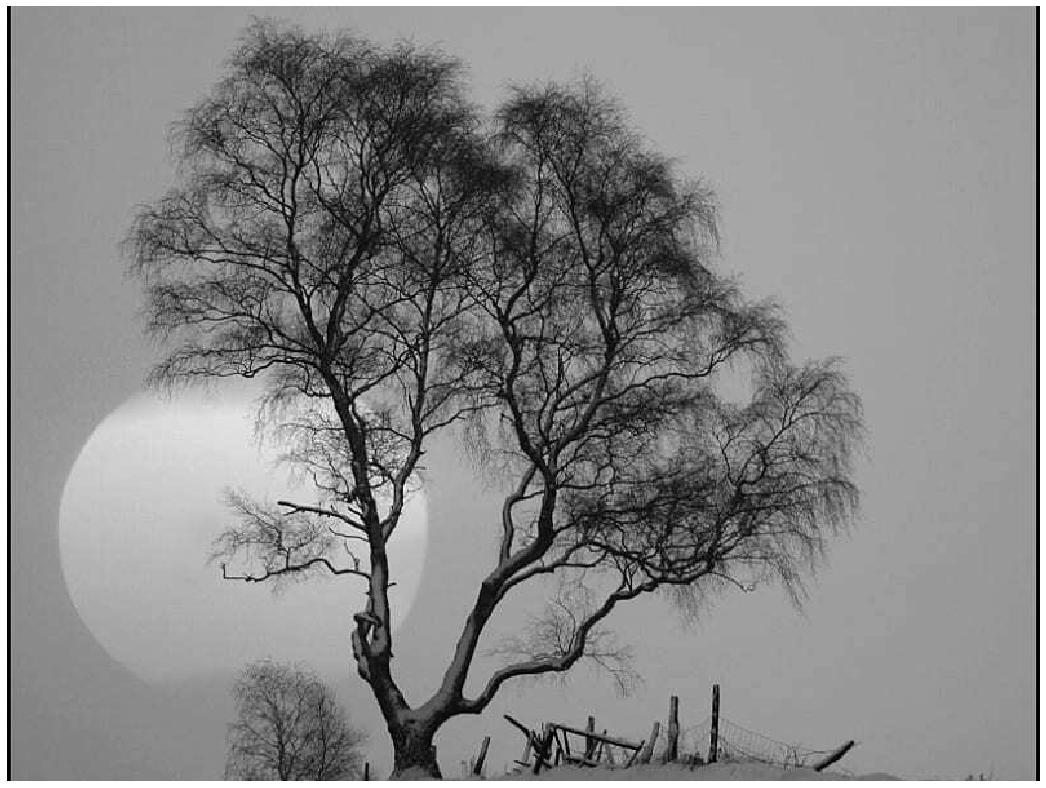

In [ ]:
# Normalize the image so that the gray scales are between 0 and 1. Save it to I and display the image
#I = None

### BEGIN SOLUTION
I = I/255.0
I = color.rgb2gray(I)
print(I.min())
print(I.max())
io.imshow(I)
plt.axis("off")
### END SOLUTION

(-0.5, 799.5, 599.5, -0.5)

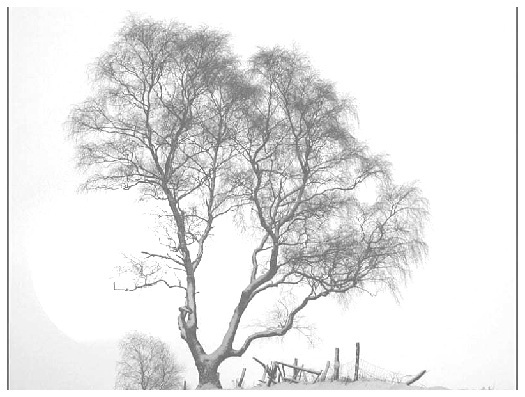

In [ ]:
# Increase the brightness of the image without changing the contrast.
# Save the resulting image in I_bright and display it.
I_bright = None

### BEGIN SOLUTION
I_bright = np.clip(I+0.4, 0, 1)
plt.subplot(1, 2, 1)
io.imshow(I_bright)
plt.axis("off")
#plt.rcParams['figure.figsize'] = (10, 25)
### END SOLUTION

(-0.5, 799.5, 599.5, -0.5)

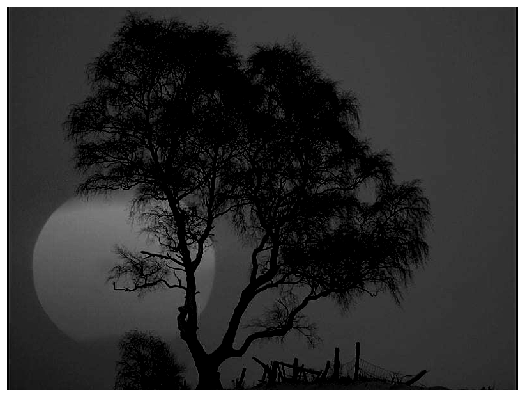

In [ ]:
# Decrease the brightness of the image without changing the contrast.
# Save the resulting image in I_dark and display it.
I_dark = None

### BEGIN SOLUTION
I_dark = np.clip(I-0.4, 0, 1)
plt.subplot(1, 2, 1)
io.imshow(I_dark)
plt.axis("off")
### END SOLUTION

/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


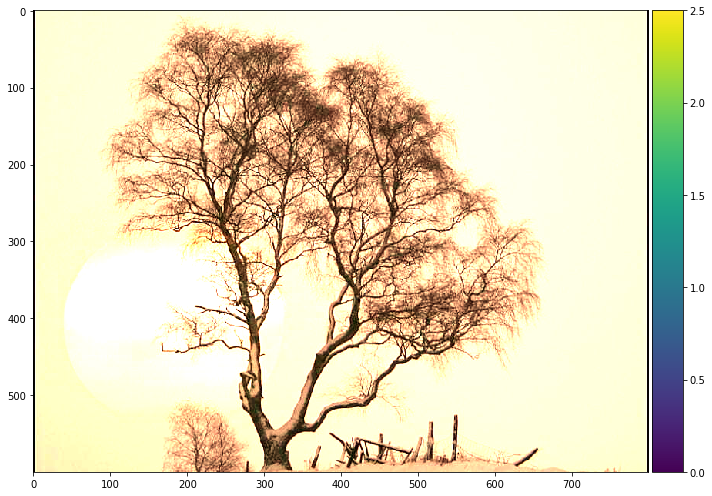

In [ ]:
# Multiply the three channels of image I with three DIFFERENT numbers between 0.3 and 3
# Save the resulting image in I_tint and display it.
# The resulting image should have some color shift
I_tint = None

# HINT:
# I_tint = np.zeros(I.shape)
# I_tint[:, :, 0] =  ..... I[:, :, 0].....
# ......

### BEGIN SOLUTION
I = io.imread("/content/sample.jpeg")
I = I/255.0
#io.imshow(I)
I_tint = np.zeros(I.shape)
I_tint[:, :, 0] =  2.5*I[:, :, 0]
I_tint[:, :, 1] =  2.0*I[:, :, 1]
I_tint[:, :, 2] =  1.5*I[:, :, 2]
plt.rcParams['figure.figsize'] = (10, 25)
io.imshow(I_tint)
### END SOLUTION

(-0.5, 799.5, 599.5, -0.5)

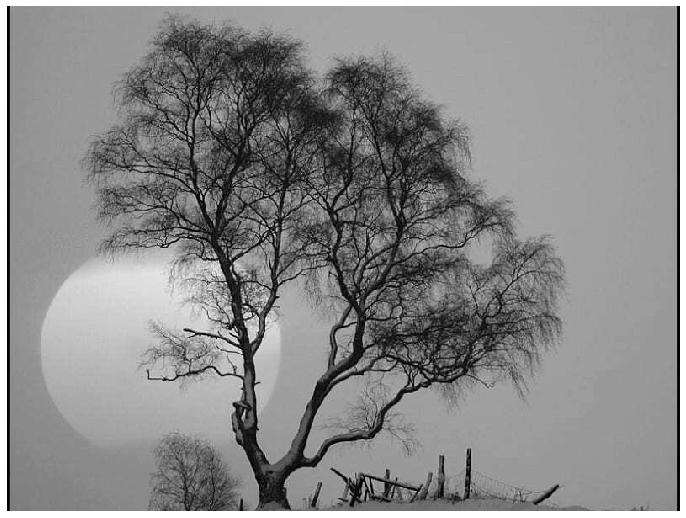

In [ ]:
# Convert the image into a grayscale image.
# Save it to I_gray and display it
I_gray = None

### BEGIN SOLUTION
I = io.imread("/content/sample.jpeg")
I = I/255.0
I_gray = color.rgb2gray(I)
io.imshow(I_gray)
plt.axis("off")
### END SOLUTION

(-0.5, 799.5, 599.5, -0.5)

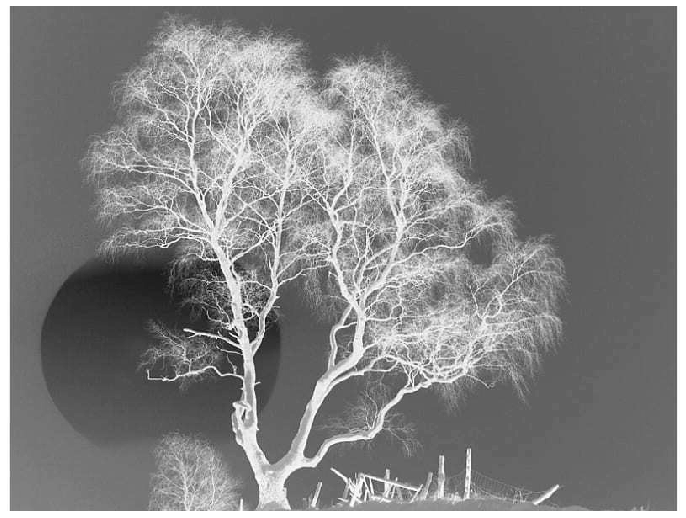

In [ ]:
# Display the negative of the grayscale image

### BEGIN SOLUTION
I = color.rgb2gray(I)
I3 = 1 - I
io.imshow(I3)
plt.axis("off")
### END SOLUTION

(-0.5, 799.5, 599.5, -0.5)

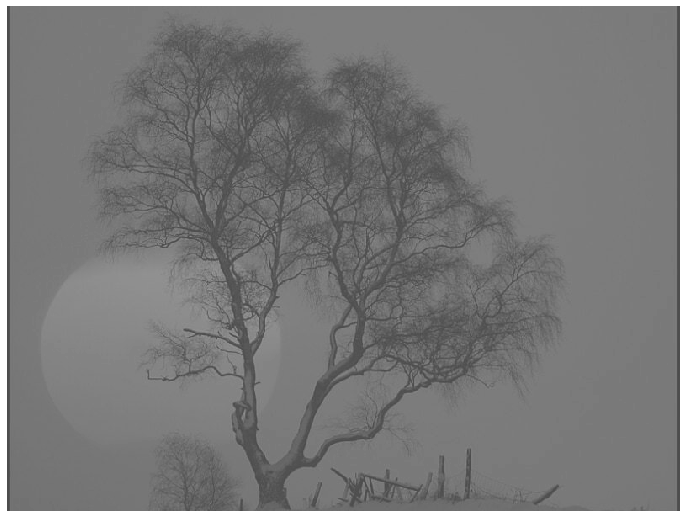

In [ ]:
# Artificially degrade the **grayscale image** by reducing it contrast
# You can do so by recaling the gray values and concentrating them in a narrow range,
# say between 0.3 and 0.6.
# Save the image as I_degraded and display it
# HINT: SEE lec-4-demo-codes

I_degraded = None

### BEGIN SOLUTION
I_degraded = exposure.rescale_intensity(I, in_range=(0, 1), out_range=(0.3, 0.6))
io.imshow(I_degraded)
plt.axis("off")
### END SOLUTION

In [ ]:
# Complete the following function to perform Piecewise Linear  Contraststretching
# That is, implement the map shown in Slide 17 of Lecture 3

# Prototype: piecewise_contrast_stretch(I_gray, r1, r2, s1, s2)
# Assuming both input and output images are normalized between 0 and 1

def piecewise_contrast_stretch(I_gray, r1, r2, s1, s2):
    #pass
    # Write your code here
    #I_stretched = None # replace with appropriate code

    ### BEGIN SOLUTION
    if (0 <= I_gray and I_gray <= r1):
        return (s1 / r1)*I_gray
    elif (r1 < I_gray and I_gray <= r2):
        return ((s2 - s1)/(r2 - r1)) * (I_gray - r1) + s1
    else:
        return ((255 - s2)/(255 - r2)) * (I_gray - r2) + s2

    ### END SOLUTION



/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


(0.09999999999999999,
 0.19839933333333332,
 0.09999999999999999,
 0.19839933333333332)

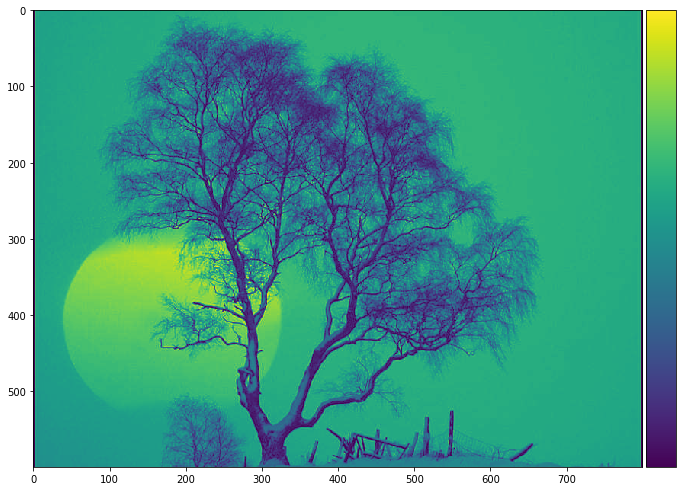

In [ ]:
# To test your implementation, contrast strech the degraded image I_degrade
r1 = None
r2 = None
s1 = None
s2 = None
#I_stretched = piecewise_contrast_stretch(I_degraded, r1, r2, s1, s2)

# Display the strtched image

### BEGIN SOLUTION
r1 = 150
r2 = 120
s1 = 50
s2 = 175
piecewise_contrast_stretch_vec = np.vectorize(piecewise_contrast_stretch)
I_stretched = piecewise_contrast_stretch_vec(I_degraded, r1, r2, s1, s2)
io.imshow(I_stretched)
plt.axis("off")
### END SOLUTION

# Task 2 - Histogram and Equalization

(-0.5, 799.5, 599.5, -0.5)

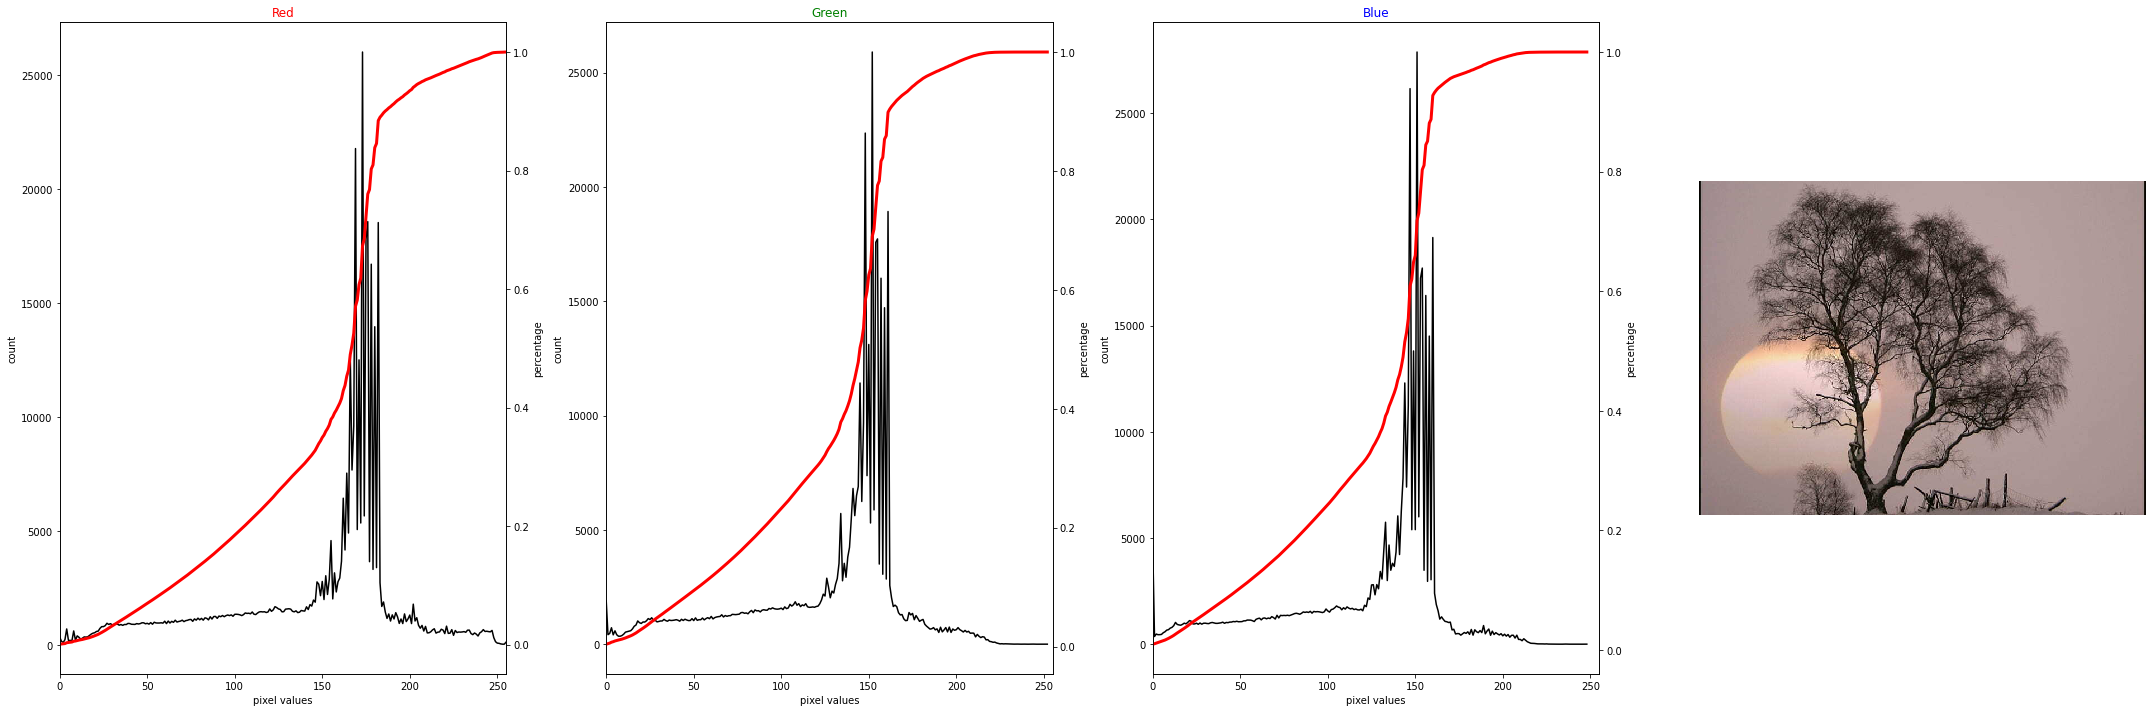

In [ ]:
# Plot the Image and its histogram + cdf of the original image I
# Note that it is a color image, so it will have three different histograms

### BEGIN SOLUTION
I = io.imread("/content/sample.jpeg")
#I = I/255.0

def plot_hist(I, nbins=256, normalize=False, plot_cdf=True):
    hist, bins_hist = exposure.histogram(I.ravel(), nbins=nbins, normalize=normalize)
    plt.plot(bins_hist, hist, 'k')
    plt.xlabel("pixel values")
    if normalize:
        plt.ylabel("probability")
    else:
        plt.ylabel("count")
    xmax = 1 if I.max() <= 1 else 255
    plt.xlim([0, xmax])

    if plot_cdf:
        cdf, bins_cdf = exposure.cumulative_distribution(I.ravel(), nbins=256)
        plt.twinx()
        plt.plot(bins_cdf, cdf, 'r', lw=3)
        plt.ylabel("percentage")

plt.rcParams['figure.figsize'] = (30,10)
plt.subplot(1, 4, 1)
plot_hist(I[:, :, 0], plot_cdf=True)
plt.title("Red", color="red")

plt.subplot(1, 4, 2)
plot_hist(I[:, :, 1], plot_cdf=True)
plt.title("Green", color="green")

plt.subplot(1, 4, 3)
plot_hist(I[:, :, 2], plot_cdf=True)
plt.title("Blue", color="blue")

plt.subplot(1, 4, 4)
io.imshow(I)
plt.axis("off")


### END SOLUTION

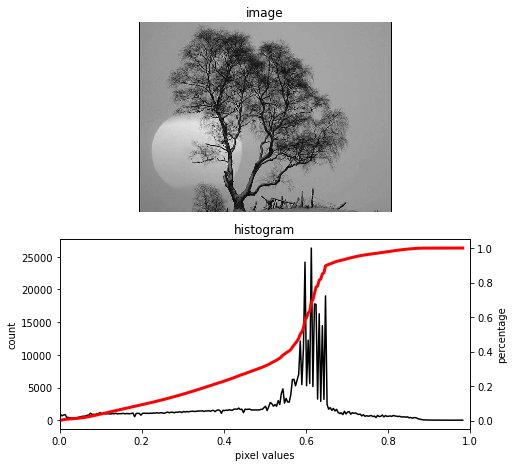

In [ ]:
# Plot the Image and its histogram + cdf of the grayscale image I_gray

### BEGIN SOLUTION
I = io.imread("/content/sample.jpeg")
#I = I/255.0
I = color.rgb2gray(I)

def plot_hist(I, nbins=256, normalize=False, plot_cdf=True):
    hist, bins_hist = exposure.histogram(I.ravel(), nbins=nbins, normalize=normalize)
    plt.plot(bins_hist, hist, 'k')
    plt.xlabel("pixel values")
    if normalize:
        plt.ylabel("probability")
    else:
        plt.ylabel("count")
    xmax = 1 if I.max() <= 1 else 255
    plt.xlim([0, xmax])

    if plot_cdf:
        cdf, bins_cdf = exposure.cumulative_distribution(I.ravel(), nbins=256)
        plt.twinx()
        plt.plot(bins_cdf, cdf, 'r', lw=3)
        plt.ylabel("percentage")

def plot_img_and_hist(I, nbins=256, normalize=False, plot_cdf=True):
    plt.subplot(2, 1, 1)
    io.imshow(I)
    plt.axis("off")
    plt.title("image")

    plt.subplot(2, 1, 2)
    plot_hist(I, nbins=nbins, normalize=normalize, plot_cdf=plot_cdf)
    plt.title("histogram")

plt.rcParams['figure.figsize'] = (6, 6)
plot_img_and_hist(I)
plt.show()




### END SOLUTION

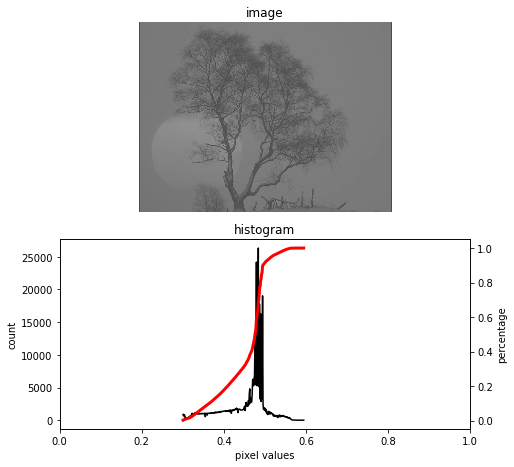

In [ ]:
# Plot the Image and its histogram + cdf of the degraded image I_degraded

### BEGIN SOLUTION
I = I_degraded
def plot_hist(I, nbins=256, normalize=False, plot_cdf=True):
    hist, bins_hist = exposure.histogram(I.ravel(), nbins=nbins, normalize=normalize)
    plt.plot(bins_hist, hist, 'k')
    plt.xlabel("pixel values")
    if normalize:
        plt.ylabel("probability")
    else:
        plt.ylabel("count")
    xmax = 1 if I.max() <= 1 else 255
    plt.xlim([0, xmax])

    if plot_cdf:
        cdf, bins_cdf = exposure.cumulative_distribution(I.ravel(), nbins=256)
        plt.twinx()
        plt.plot(bins_cdf, cdf, 'r', lw=3)
        plt.ylabel("percentage")

def plot_img_and_hist(I, nbins=256, normalize=False, plot_cdf=True):
    plt.subplot(2, 1, 1)
    io.imshow(I)
    plt.axis("off")
    plt.title("image")

    plt.subplot(2, 1, 2)
    plot_hist(I, nbins=nbins, normalize=normalize, plot_cdf=plot_cdf)
    plt.title("histogram")

plt.rcParams['figure.figsize'] = (6, 6)
plot_img_and_hist(I)
plt.show()


### END SOLUTION

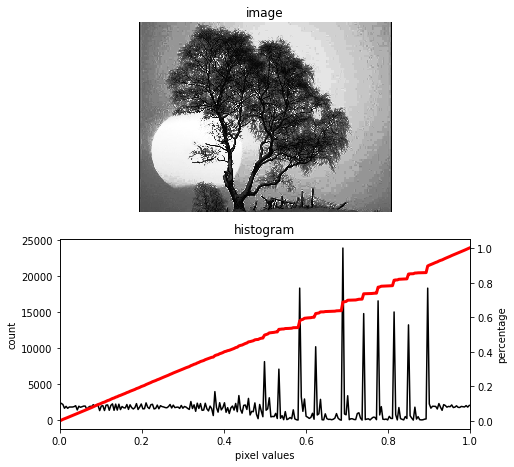

In [ ]:
# Equalize the histogram of the degraded image I_degraded
# Save the result in I_recon_gray, display the image along with its histogram

I_recon_gray = None

### BEGIN SOLUTION
def plot_img_and_hist(I, nbins=256, normalize=False, plot_cdf=True):
    plt.subplot(2, 1, 1)
    io.imshow(I)
    plt.axis("off")
    plt.title("image")

    plt.subplot(2, 1, 2)
    plot_hist(I, nbins=nbins, normalize=normalize, plot_cdf=plot_cdf)
    plt.title("histogram")

I_recon_gray = exposure.equalize_hist(I)
plt.rcParams['figure.figsize'] = (6, 6)
plot_img_and_hist(I_recon_gray)
### END SOLUTION

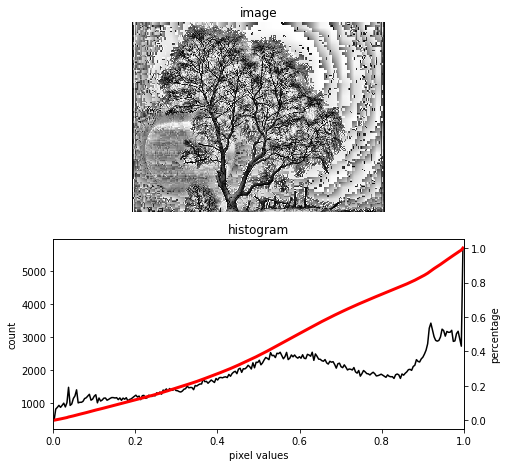

In [ ]:
# Equalize the histogram of the degraded image I_degraded using AHE
# Save the result in I_recon_gray_2, display the image along with its histogram

I_recon_gray_2 = None

### BEGIN SOLUTION
I = I_degraded
def plot_img_and_hist(I, nbins=256, normalize=False, plot_cdf=True):
    plt.subplot(2, 1, 1)
    io.imshow(I)
    plt.axis("off")
    plt.title("image")

    plt.subplot(2, 1, 2)
    plot_hist(I, nbins=nbins, normalize=normalize, plot_cdf=plot_cdf)
    plt.title("histogram")

I_recon_gray_2 =  exposure.equalize_adapthist(I, kernel_size=(36, 36), clip_limit=0)
plot_img_and_hist(I_recon_gray_2)
### END SOLUTION

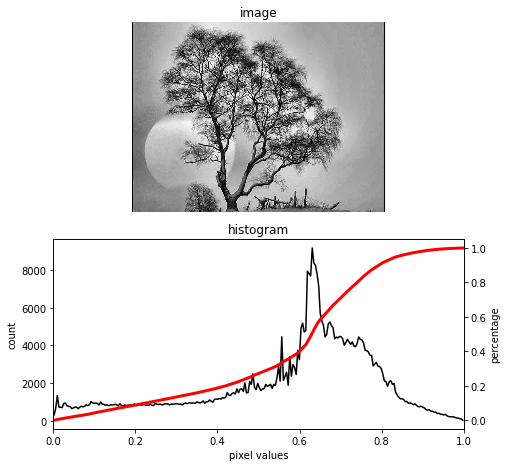

In [ ]:
# Equalize the histogram of the degraded image I_degraded using CLAHE
# Save the result in I_recon_gray_2, display the image along with its histogram

I_recon_gray_3 = None

### BEGIN SOLUTION
def plot_img_and_hist(I, nbins=256, normalize=False, plot_cdf=True):
    plt.subplot(2, 1, 1)
    io.imshow(I)
    plt.axis("off")
    plt.title("image")

    plt.subplot(2, 1, 2)
    plot_hist(I, nbins=nbins, normalize=normalize, plot_cdf=plot_cdf)
    plt.title("histogram")


I_recon_gray_3 = exposure.equalize_adapthist(I, kernel_size=(100, 100), clip_limit=0.01)
plot_img_and_hist(I_recon_gray_3)
### END SOLUTION

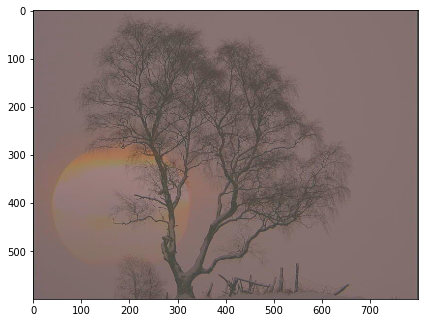

In [ ]:
# Artificially degrade the original **RGB image** by reducing it contrast
# You can do so by recaling the values of the L channel (in LAB color space)
# and concentrating them in a narrow range, say between 0.3 and 0.6.
# Save the image as I_rgb_degraded and display it
# HINT: SEE lec-4-demo-codes

I_rgb_degraded = None

### BEGIN SOLUTION
I = io.imread("/content/sample.jpeg")
I = I/255.0
Ilab = color.rgb2lab(I)
Ilab[:, :, 0] = Ilab[:, :, 0]/100
Idegraded_l = exposure.rescale_intensity(Ilab[:, :, 0], in_range=(0, 1), out_range=(0.3, 0.6))
Ilab[:, :, 0] = Idegraded_l*100
I_rgb_degraded = color.lab2rgb(Ilab)
io.imshow(I_rgb_degraded)

### END SOLUTION

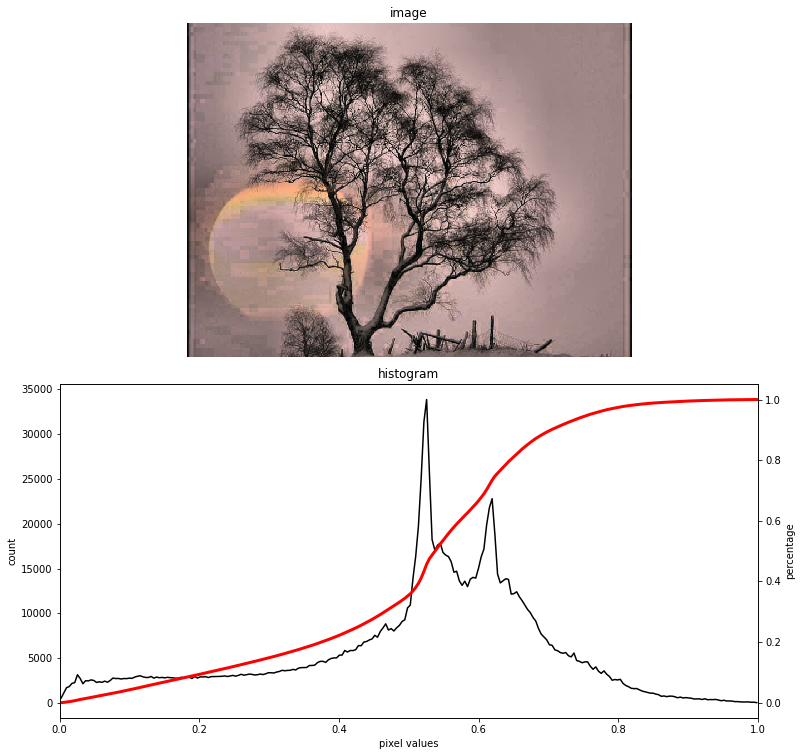

In [ ]:
# Equalize the histogram of the degraded color image I_rgb_degraded using CLAHE
# Save the result in I_recon_color, display the image along with its histogram
# HINT: You have to convert to LAB first
# See the lecture and lecture-4-demo-codes

I_recon_color = None

### BEGIN SOLUTION
I = I_rgb_degraded
Ilab = color.rgb2lab(I)
#Ilab[:, :, 0] = Ilab[:, :, 0]/100
I_recon_color_1 = exposure.equalize_adapthist(I, kernel_size=(100, 100), clip_limit=0.01)
#Ilab[:, :, 0] = I_recon_color_1*100
#I_recon_color = color.lab2rgb(Ilab)
plt.rcParams['figure.figsize'] = (10, 10)
plot_img_and_hist(I_recon_color_1)


### END SOLUTION

# Task 3 - Open Ended

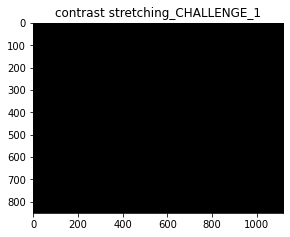

Text(0.5, 1.0, 'CLAHE_CHALLENGE_1')

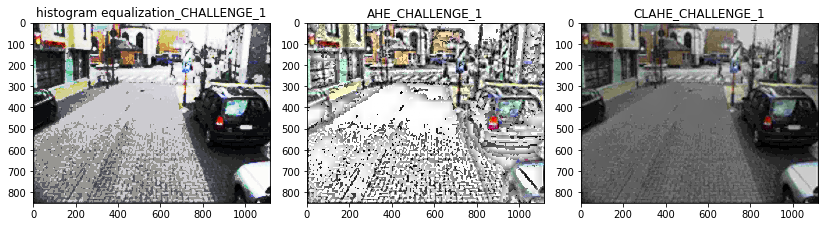

In [ ]:
# There are four degraded images in this directory
# challenge-1.jpeg = very dark
# challenge-2.jpeg = washed out/foggy
# challenge-3.jpeg = alternative black bars
# challenge-4.jpeg = discoloured (the image is actually a color image) [BONUS]

# Your task is to improve these images using
# contrast stretching, histogram equalization, AHE or CLAHE
# try different combination of parameter settings to see which produces the best result

### BEGIN SOLUTION
C_1 = io.imread("/content/challenge-1.jpg")
C_1 = C_1/255.0
C_2 = io.imread("/content/challenge-2.jpg")
C_2 = C_2/255.0
C_3 = io.imread("/content/challenge-3.jpg")
C_3 = C_3/255.0
C_4 = io.imread("/content/challenge-4.jpg")
C_4 = C_4/255.0

plt.rcParams['figure.figsize'] = (15, 15)


plt.subplot(1, 4, 1)
I1_stretched = np.clip(2*(C_1-0.2), 0, 1)
io.imshow(I1_stretched)
plt.title("contrast stretching_CHALLENGE_1")
#plt.axis("off")
plt.show()
plt.subplot(1, 4, 2)
Ieq_1 = C_1.copy()
Ieq_1[:, :, 0] = exposure.equalize_hist(C_1[:, :, 0])
Ieq_1[:, :, 1] = exposure.equalize_hist(C_1[:, :, 1])
Ieq_1[:, :, 2] = exposure.equalize_hist(C_1[:, :, 2])
plt.title("histogram equalization_CHALLENGE_1")
io.imshow(Ieq_1)

plt.subplot(1, 4, 3)
Ilab = color.rgb2lab(C_1)
I_adapt_eq_1 = exposure.equalize_adapthist(C_1, kernel_size=(36, 36), clip_limit=0)
plt.title("AHE_CHALLENGE_1")
io.imshow(I_adapt_eq_1)

plt.subplot(1, 4, 4)
Ilab = color.rgb2lab(C_1)
I_recon_color_1 = exposure.equalize_adapthist(C_1, kernel_size=(100, 100), clip_limit=0.01)
io.imshow(I_recon_color_1)
plt.title("CLAHE_CHALLENGE_1")



### END SOLUTION

# **For Challenge 2**

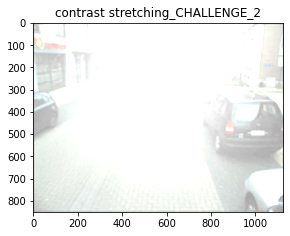

Text(0.5, 1.0, 'CLAHE_CHALLENGE_2')

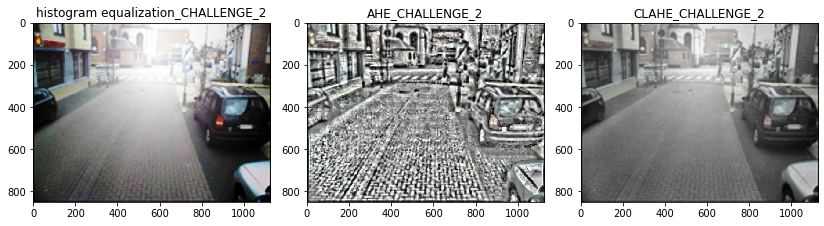

In [ ]:
plt.subplot(1, 4, 1)
I1_stretched_2 = np.clip(2*(C_2-0.1), 0, 1)
io.imshow(I1_stretched_2)
plt.title("contrast stretching_CHALLENGE_2")
plt.show()

plt.subplot(1, 4, 2)
Ieq_2 = C_2.copy()
Ieq_2[:, :, 0] = exposure.equalize_hist(C_2[:, :, 0])
Ieq_2[:, :, 1] = exposure.equalize_hist(C_2[:, :, 1])
Ieq_2[:, :, 2] = exposure.equalize_hist(C_2[:, :, 2])
plt.title("histogram equalization_CHALLENGE_2")
io.imshow(Ieq_2)

plt.subplot(1, 4, 3)
Ilab = color.rgb2lab(C_2)
I_adapt_eq_2 = exposure.equalize_adapthist(C_2, kernel_size=(36, 36), clip_limit=0)
plt.title("AHE_CHALLENGE_2")
io.imshow(I_adapt_eq_2)

plt.subplot(1, 4, 4)
Ilab = color.rgb2lab(C_2)
I_recon_color_2 = exposure.equalize_adapthist(C_2, kernel_size=(100, 100), clip_limit=0.01)
io.imshow(I_recon_color_2)
plt.title("CLAHE_CHALLENGE_2")

# **For Challenge 3**

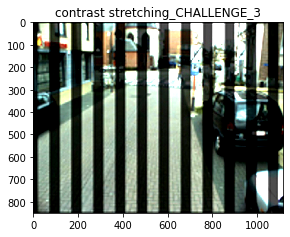

Text(0.5, 1.0, 'CLAHE_CHALLENGE_3')

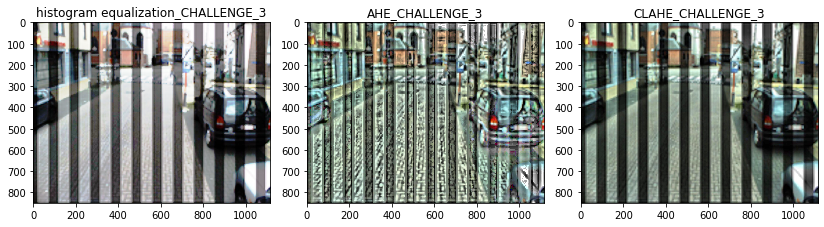

In [ ]:
plt.subplot(1, 4, 1)
I1_stretched_3 = np.clip(2*(C_3-0.1), 0, 1)
io.imshow(I1_stretched_3)
plt.title("contrast stretching_CHALLENGE_3")
plt.show()

plt.subplot(1, 4, 2)
Ieq_3 = C_3.copy()
Ieq_3[:, :, 0] = exposure.equalize_hist(C_3[:, :, 0])
Ieq_3[:, :, 1] = exposure.equalize_hist(C_3[:, :, 1])
Ieq_3[:, :, 2] = exposure.equalize_hist(C_3[:, :, 2])
plt.title("histogram equalization_CHALLENGE_3")
io.imshow(Ieq_3)

plt.subplot(1, 4, 3)
Ilab = color.rgb2lab(C_3)
I_adapt_eq_3 = exposure.equalize_adapthist(C_3, kernel_size=(36, 36), clip_limit=0)
plt.title("AHE_CHALLENGE_3")
io.imshow(I_adapt_eq_3)

plt.subplot(1, 4, 4)
Ilab = color.rgb2lab(C_3)
I_recon_color_3 = exposure.equalize_adapthist(C_3, kernel_size=(100, 100), clip_limit=0.01)
io.imshow(I_recon_color_3)
plt.title("CLAHE_CHALLENGE_3")

# **For Challenge 4**

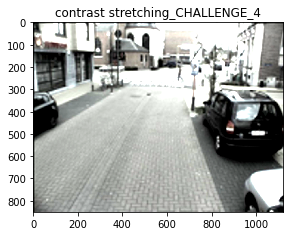

Text(0.5, 1.0, 'CLAHE_CHALLENGE_4')

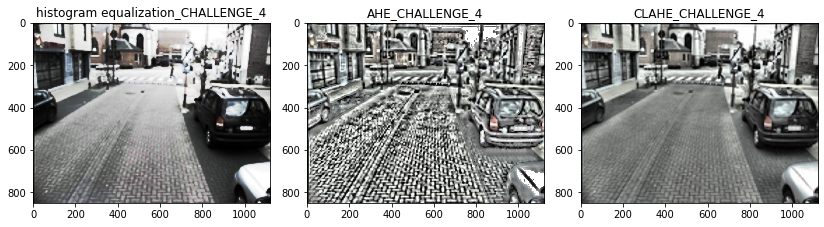

In [ ]:
plt.subplot(1, 4, 1)
I1_stretched_4 = np.clip(2*(C_4-0.1), 0, 1)
io.imshow(I1_stretched_4)
plt.title("contrast stretching_CHALLENGE_4")
plt.show()

plt.subplot(1, 4, 2)
Ieq_4 = C_4.copy()
Ieq_4[:, :, 0] = exposure.equalize_hist(C_4[:, :, 0])
Ieq_4[:, :, 1] = exposure.equalize_hist(C_4[:, :, 1])
Ieq_4[:, :, 2] = exposure.equalize_hist(C_4[:, :, 2])
plt.title("histogram equalization_CHALLENGE_4")
io.imshow(Ieq_4)

plt.subplot(1, 4, 3)
Ilab = color.rgb2lab(C_4)
I_adapt_eq_4 = exposure.equalize_adapthist(C_4, kernel_size=(36, 36), clip_limit=0)
plt.title("AHE_CHALLENGE_4")
io.imshow(I_adapt_eq_4)

plt.subplot(1, 4, 4)
Ilab = color.rgb2lab(C_4)
I_recon_color_4 = exposure.equalize_adapthist(C_4, kernel_size=(100, 100), clip_limit=0.01)
io.imshow(I_recon_color_4)
plt.title("CLAHE_CHALLENGE_4")